In [1]:
from environment import Environment
from agent_replay import Agent
from utils import plot_need_values, plot_maze_values
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Q = np.load('/home/georgy/Documents/Dayan_lab/PhD/bandits/maze/data/moves/Q_3000.npz')
Q = Q['Q_history'][0]

In [3]:
config       = np.zeros((4, 6))
num_states   = config.shape[0]*config.shape[1]
goal_coords  = [0, 5]
start_coords = [3, 2]
rew_value    = 1

config[goal_coords[0], goal_coords[1]] = rew_value

blocked_state_actions = [
                        [7,  1], [8,  1], [9,  1], [10, 1], [11, 1],
                        [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], 
                        ]

uncertain_states_actions = [17, 0]
num_y_states = 4
num_x_states = 6
goal_state   = 5
start_state  = 20
num_actions  = 4

gamma   = 0.9
alpha   = 1.0
alpha_r = 1.0
horizon = 4 # minus 1
xi      = 1e-3

M       = np.ones(2)

agent = Agent(config, start_coords, goal_coords, blocked_state_actions, uncertain_states_actions, alpha, alpha_r, gamma, horizon, xi, policy_temp=4)

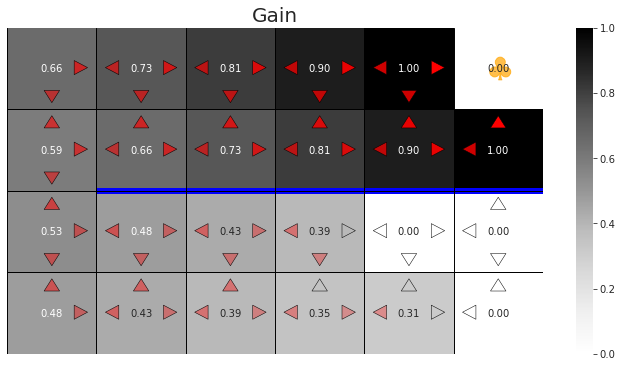

In [4]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
plot_maze_values(Q, [], ax, num_y_states, num_x_states, goal_state, blocked_state_actions)

In [10]:
need = np.load('/home/georgy/Documents/Dayan_lab/PhD/bandits/maze/data/bamcp/need/need.npy')[20, :]

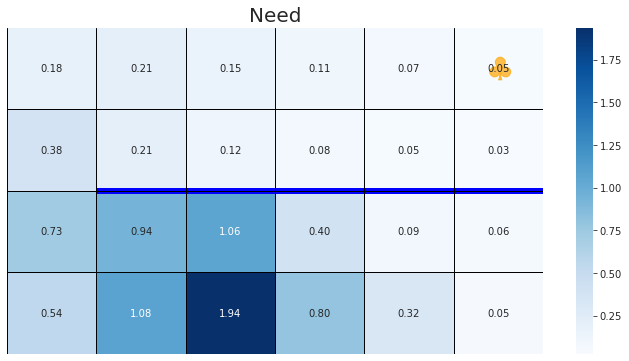

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
plot_need_values(need, ax, num_y_states, num_x_states, goal_state, blocked_state_actions)

In [12]:
need = []

for alpha in range(1, 100):

    M  = np.array([alpha, 1])

    Ta = np.zeros((num_states, num_actions, num_states))

    # set edge Q values to np.nan
    for s in np.delete(range(num_states), goal_state):
        for a in range(num_actions):
            if (s == uncertain_states_actions[0]):
                if (a == uncertain_states_actions[1]):
                    s1, _ = agent._get_new_state(s, a, unlocked=True)
                    Ta[s, a, s1] = M[0]/(np.sum(M))
                    Ta[s, a, s]  = M[1]/(np.sum(M))
            else:
                s1, _ = agent._get_new_state(s, a, unlocked=False)
                Ta[s, a, s1] = 1

    for a in range(num_actions):
        Ta[goal_state, a, start_state] = 1

    T = np.zeros((num_states, num_states))
    for s in range(num_states):
        qs    = Q[s, :]
        probs = agent._policy(qs.copy()) 
        for a in range(num_actions):
            T[s, :] += probs[a] * Ta[s, a, :]

    need += [np.linalg.inv(np.eye(num_states) - gamma*T)[20, 11]]

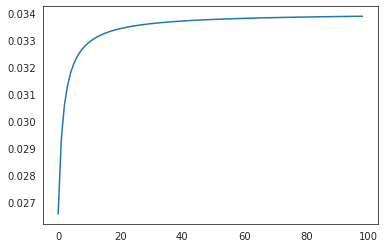

In [13]:
plt.plot(need)

AttributeError: 'list' object has no attribute 'reshape'

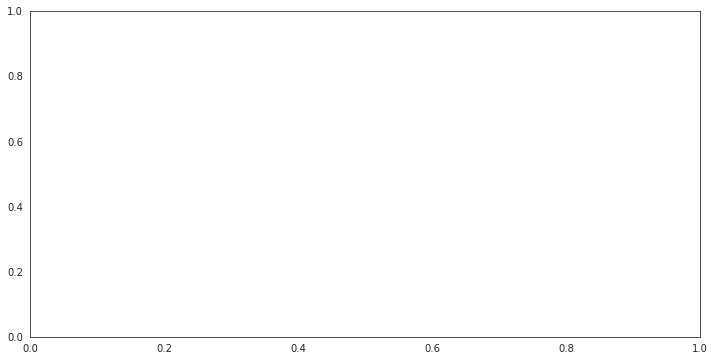

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
plot_need_values(need, ax, num_y_states, num_x_states, goal_state, blocked_state_actions)